<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Data-Science/blob/main/YFinanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Analysis Buy and Hold Vs Active trading

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime




In [ ]:
!pip install mplchart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mplchart: filename=mplchart-0.0.3-py3-none-any.whl size=28412 sha256=966b4e46e164ab525defecd4eabcc1e71edcf14aed6659fd06c7b1a3c8749eb1
  Stored in directory: /root/.cache/pip/wheels/d3/95/3b/ba714aea99563a171a94e623569c8062f06674025ec5adaef2
Successfully built mplchart


# Installing Library for Technical Indicators

In the following lines, we will install the TA-Lib library

In [ ]:
import os
os.chdir("/usr")

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -P /usr
!tar -xzf ta-lib-0.4.0-src.tar.gz

--2023-12-04 00:46:11--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-04 00:46:12--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-04 00:46:12--  http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving onboa

In [ ]:
import os
os.chdir('/usr/ta-lib')

In [ ]:
!./configure --prefix=/usr
!make
!sudo make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [ ]:
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017534 sha256=d9160fff2e1cc49f0768aad9d0197d5d5392d2fd49f3af5c9f2652cee8ce3720
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-Lib


We are using the Microsoft Sock information

In [ ]:
# import yfinance as yf
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import seaborn as sns
# money_Over_Time = []
# # Download the historical data for the asset
# stock = yf.Ticker("MSFT")
# data = stock.history(period="30y")

# # Set the fixed investment amount
# fixed_investment_amount = 1000

# # Initialize variables
# balance = 0
# invested_shares = 0
# total_invested = 0
# curr_year = 0

# annual_balance = 0
# annual_invested_shares = 0
# annual_total_invested = 0
# # Yearly investment loop
# for ind in data.index:
#     if ind.year != curr_year and ind.day == 1:  # Invest on the first day of each year
#         curr_year = ind.year

#         # CUMMULATIVE Print annual percent return for year to date
#         if total_invested != 0:
#             cumulative_annual_return = ((balance - total_invested) / total_invested) * 100
#             print(f"Year: {curr_year - 1}, Cummulative Annual Percent Return: {cumulative_annual_return:.2f}%")
#         else:
#             print(f"Year: {curr_year - 1}, Cummulative Annual Percent Return: N/A (Total invested is zero)")

#         # NOT CUMMULATIVE Print annual percent return for the previous year
#         if annual_total_invested != 0:
#             annual_return = ((annual_balance - annual_total_invested) / annual_total_invested) * 100
#             print(f"Year: {curr_year - 1}, Annual Percent Return: {annual_return:.2f}%")
#         else:
#             print(f"Year: {curr_year - 1}, Annual Percent Return: N/A (Total invested is zero)")
#         # Reset variables for the new year
#         annual_balance = 0
#         annual_invested_shares = 0
#         annual_total_invested = 0

#     # Invest on the first day of each month
#     if ind.month != curr_mon:
#         curr_mon = ind.month

#         #---------------------Cummulative------------------------------------------#
#         # Calculate the number of shares to buy with the fixed investment amount
#         monthly_close_price = data['Close'][ind]
#         shares_bought = fixed_investment_amount / monthly_close_price
#         total_invested += fixed_investment_amount
#         # Update balance and invested shares
#         invested_shares += shares_bought
#         balance = invested_shares * monthly_close_price


#         #---------------------Not Cummulative------------------------------------------#
#         # Calculate the number of shares to buy with the fixed investment amount
#         # monthly_close_price = data['Close'][ind]
#         # shares_bought = fixed_investment_amount / monthly_close_price
#         annual_total_invested += fixed_investment_amount
#         # Update balance and invested shares
#         annual_invested_shares += shares_bought
#         annual_balance = annual_invested_shares * monthly_close_price
#         money_Over_Time.append([balance, ind])


#         # Print buy date and price for each month
#         print(f"Year: {curr_year}, Buy Date: {ind.date()}, Buy Price: ${monthly_close_price:.2f}, Money Made: ${(balance - total_invested):.2f}")

# # Print the annual percent return for the final year
# if total_invested != 0:
#     annual_return = ((balance - total_invested) / total_invested) * 100
#     print(f"Year: {curr_year}, Annual Percent Return: {annual_return:.2f}%")
# else:
#     print(f"Year: {curr_year}, Annual Percent Return: N/A (Total invested is zero)")

# if annual_total_invested != 0:
#     annual_return = ((annual_balance - annual_total_invested) / annual_total_invested) * 100
#     print(f"Year: {curr_year}, Annual Percent Return: {annual_return:.2f}%")
# else:
#     print(f"Year: {curr_year}, Annual Percent Return: N/A (Total invested is zero)")

# df = pd.DataFrame(money_Over_Time, columns = ["Money", "Date"])
# ax = sns.lineplot(data = df, x = "Date", y = "Money")
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,1000000))
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set(title= "Money Over Time")
# plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt


# Download the historical data for the asset
stock = yf.Ticker("MSFT")
data = stock.history(period="30y")

# Calculate the simple moving average (SMA)
data["sma_10"] = ta.SMA(data["Close"], timeperiod=10)
data["sma_50"] = ta.SMA(data["Close"], timeperiod=50)
data["sma_200"] = ta.SMA(data["Close"], timeperiod=200)

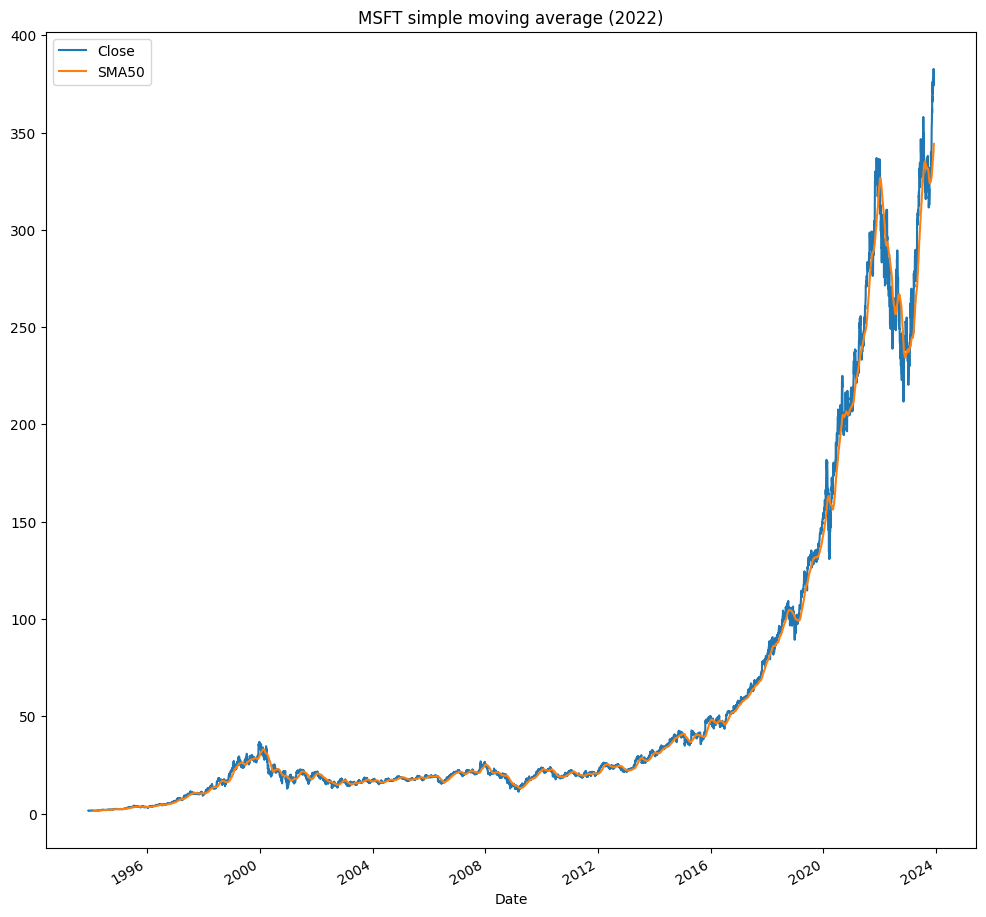

In [ ]:
data['SMA50'] = ta.SMA(data['Close'],50)
data[['Close', 'SMA50']].plot(figsize=(12,12))
plt.title("MSFT simple moving average (2022)")
plt.show()

In [ ]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_10,sma_50,sma_200,SMA50
Date,,,,,,,,,,,
2023-11-27 00:00:00-05:00,376.779999,380.640015,376.200012,378.609985,22179200,0.0,0.0,373.554727,339.801308,315.365535,339.801308
2023-11-28 00:00:00-05:00,378.350006,383.000000,378.160004,382.700012,20453100,0.0,0.0,375.231003,340.887439,315.975097,340.887439
2023-11-29 00:00:00-05:00,383.760010,384.299988,377.440002,378.850006,28963400,0.0,0.0,376.164005,341.904753,316.524670,341.904753
2023-11-30 00:00:00-05:00,378.489990,380.089996,375.470001,378.910004,30554400,0.0,0.0,377.088004,343.080548,317.070330,343.080548
2023-12-01 00:00:00-05:00,376.760010,378.160004,371.309998,374.510010,33020400,0.0,0.0,376.922003,344.193093,317.604772,344.193093


The code below is the buy and hold strategy.


Year: 1992, Cummulative Annual Percent Return: N/A (Total invested is zero)
Year: 1992, Annual Percent Return: N/A (Total invested is zero)
Year: 1993, Buy Date: 1993-12-02, Buy Price: $1.61, Money Made: $0.00
Year: 1993, Cummulative Annual Percent Return: 0.00%
Year: 1993, Annual Percent Return: 0.00%
Year: 1994, Buy Date: 1994-01-03, Buy Price: $1.55, Money Made: $-33.18
Year: 1994, Buy Date: 1994-02-01, Buy Price: $1.65, Money Made: $89.55
Year: 1994, Buy Date: 1994-03-01, Buy Price: $1.61, Money Made: $21.50
Year: 1994, Buy Date: 1994-04-04, Buy Price: $1.64, Money Made: $81.88
Year: 1994, Buy Date: 1994-05-02, Buy Price: $1.85, Money Made: $743.43
Year: 1994, Buy Date: 1994-06-01, Buy Price: $2.05, Money Made: $1484.85
Year: 1994, Buy Date: 1994-07-01, Buy Price: $1.95, Money Made: $1044.60
Year: 1994, Buy Date: 1994-08-01, Buy Price: $2.07, Money Made: $1607.08
Year: 1994, Buy Date: 1994-09-01, Buy Price: $2.17, Money Made: $2153.58
Year: 1994, Buy Date: 1994-10-03, Buy Price: $2

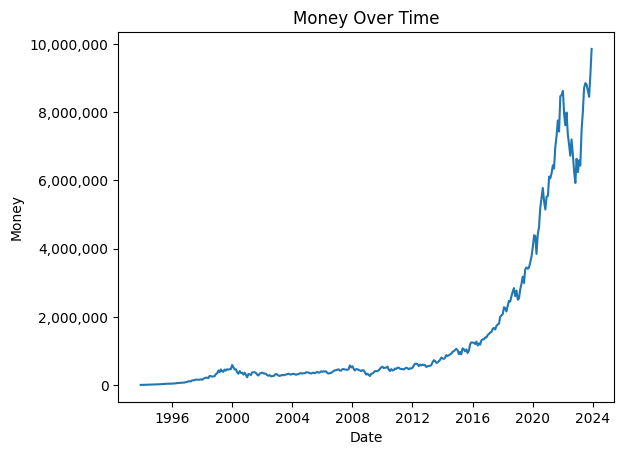

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
money_Over_Time = []
# Download the historical data for the asset
stock = yf.Ticker("MSFT")
data = stock.history(period="30y")

# Set the fixed investment amount
fixed_investment_amount = 1000

# Initialize variables
balance = 0
invested_shares = 0
total_invested = 0
curr_year = 0
curr_mon = 0


annual_balance = 0
annual_invested_shares = 0
annual_total_invested = 0
# Yearly investment loop
for ind in data.index:
    if ind.year != curr_year:  # Invest on the first day of each year
        curr_year = ind.year

        # CUMMULATIVE Print annual percent return for year to date
        if total_invested != 0:
            cumulative_annual_return = ((balance - total_invested) / total_invested) * 100
            print(f"Year: {curr_year - 1}, Cummulative Annual Percent Return: {cumulative_annual_return:.2f}%")
        else:
            print(f"Year: {curr_year - 1}, Cummulative Annual Percent Return: N/A (Total invested is zero)")

        # NOT CUMMULATIVE Print annual percent return for the previous year
        if annual_total_invested != 0:
            annual_return = ((annual_balance - annual_total_invested) / annual_total_invested) * 100
            print(f"Year: {curr_year - 1}, Annual Percent Return: {annual_return:.2f}%")
        else:
            print(f"Year: {curr_year - 1}, Annual Percent Return: N/A (Total invested is zero)")
        # Reset variables for the new year
        annual_balance = 0
        annual_invested_shares = 0
        annual_total_invested = 0

    # Invest on the first day of each month
    if ind.month != curr_mon:
        curr_mon = ind.month

        #---------------------Cummulative------------------------------------------#
        # Calculate the number of shares to buy with the fixed investment amount
        monthly_close_price = data['Close'][ind]
        shares_bought = fixed_investment_amount / monthly_close_price
        total_invested += fixed_investment_amount
        # Update balance and invested shares
        invested_shares += shares_bought
        balance = invested_shares * monthly_close_price


        #---------------------Not Cummulative------------------------------------------#
        # Calculate the number of shares to buy with the fixed investment amount
        # monthly_close_price = data['Close'][ind]
        # shares_bought = fixed_investment_amount / monthly_close_price
        annual_total_invested += fixed_investment_amount
        # Update balance and invested shares
        annual_invested_shares += shares_bought
        annual_balance = annual_invested_shares * monthly_close_price
        money_Over_Time.append([balance, ind])


        # Print buy date and price for each month
        print(f"Year: {curr_year}, Buy Date: {ind.date()}, Buy Price: ${monthly_close_price:.2f}, Money Made: ${(balance - total_invested):.2f}")

# Print the annual percent return for the final year
if total_invested != 0:
    annual_return = ((balance - total_invested) / total_invested) * 100
    print(f"Year: {curr_year}, Cummulative Annual Percent Return: {annual_return:.2f}%")
else:
    print(f"Year: {curr_year}, Annual Percent Return: N/A (Total invested is zero)")

if annual_total_invested != 0:
    annual_return = ((annual_balance - annual_total_invested) / annual_total_invested) * 100
    print(f"Year: {curr_year}, Annual Percent Return: {annual_return:.2f}%")
else:
    print(f"Year: {curr_year}, Annual Percent Return: N/A (Total invested is zero)")

df = pd.DataFrame(money_Over_Time, columns = ["Money", "Date"])
ax = sns.lineplot(data = df, x = "Date", y = "Money")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,1000000))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(title= "Money Over Time")
plt.show()

In [ ]:
#data['aboveSMA'] = data['Close'] > data['SMA50']

Below is the code for active trading.

Date: 1993-12-02	 Sell/Keep	 Profit: $0.00		 Equity: $1000.00
Year: 1993	 Annual Percent Return: 0.00%
Date: 1994-01-03	 Sell/Keep	 Profit: $0.00		 Equity: $2000.00
Date: 1994-02-01	 Buy		 Profit: $0.00		 Equity: $3000.00
Date: 1994-03-01	 Buy		 Profit: $-66.08		 Equity: $3933.92
Date: 1994-04-04	 Buy		 Profit: $-7.01		 Equity: $4992.99
Date: 1994-05-02	 Buy		 Profit: $642.96		 Equity: $6642.96
Date: 1994-06-01	 Buy		 Profit: $1373.34		 Equity: $8373.34
Date: 1994-07-01	 Sell/Keep	 Profit: $938.88		 Equity: $8938.88
Date: 1994-08-01	 Buy		 Profit: $938.88		 Equity: $9938.88
Date: 1994-09-01	 Buy		 Profit: $1450.95		 Equity: $11450.95
Date: 1994-10-03	 Sell/Keep	 Profit: $1399.95		 Equity: $12399.95
Date: 1994-11-01	 Buy		 Profit: $1399.95		 Equity: $13399.95
Date: 1994-12-01	 Sell/Keep	 Profit: $1359.91		 Equity: $14359.91
Year: 1994	 Annual Percent Return: 10.46%
Date: 1995-01-03	 Sell/Keep	 Profit: $1359.91		 Equity: $15359.91
Date: 1995-02-01	 Sell/Keep	 Profit: $1359.91		 Equity: $

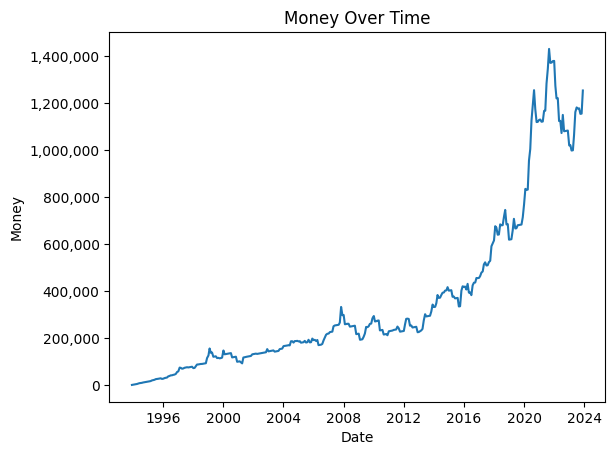

In [ ]:
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Download the historical data for the asset
stock = yf.Ticker("MSFT")
data = stock.history(period="30y")

# Calculate the SMA (Simple Moving Average)
data['SMA'] = ta.SMA(data['Close'], timeperiod=20)

balance = 0
invested = False
total_money_gained = 0
invest = 1000
stock = 0
months = 0
curr_mon = 0
money_Over_Time = []

for ind in data.index:
  if ind.month != curr_mon:
    curr_mon = ind.month
    smaCross = data['Close'][ind] > data['SMA'][ind]
    balance += invest
    months += 1


    if (((not invested) and (smaCross)) or ((invested) and (smaCross))):
        # buy
        buy_price = data['Close'][ind]
        stock += balance / buy_price
        invested = True
        balance = 0
        total_money_gained = (stock * buy_price) - (invest * months)
        print(f"Date: {ind.date()}\t Buy\t\t Profit: ${total_money_gained:.2f}\t\t Equity: ${(stock * buy_price)+ balance:.2f}")
        #f"Date: {ind.date()}, Sell/Keep , Stock: {stock:.2f}, Balance: ${balance:.2f}, Profit: ${total_money_gained:.2f}, Money: {(stock * buy_price)+ balance:.2f}
        money_Over_Time.append([((stock * buy_price)+ balance), ind])
        if (curr_mon == 12):

          annual = (total_money_gained / (invest * months)) * 100
          print(f"Year: {ind.year}\t Annual Percent Return: {annual:.2f}%")


    elif (((invested) and (not smaCross)) or ((not invested) and (not smaCross))):
        # sell
        sell_price = data['Close'][ind]
        balance += stock * sell_price
        invested = False
        stock = 0
        total_money_gained = balance - (invest * months)
        print(f"Date: {ind.date()}\t Sell/Keep\t Profit: ${total_money_gained:.2f}\t\t Equity: ${(stock * sell_price)+ balance:.2f}")
        #f"Date: {ind.date()}, Sell/Keep , Stock: {stock:.2f}, Balance: ${balance:.2f}, Profit: ${total_money_gained:.2f}, Money: {(stock * buy_price)+ balance:.2f}
        money_Over_Time.append([((stock * sell_price)+ balance), ind])
        if (curr_mon == 12):

          annual = (total_money_gained / (invest * months)) * 100
          print(f"Year: {ind.year}\t Annual Percent Return: {annual:.2f}%")

# Print the final result
sell_price = data['Close'][ind]
equity = (stock * sell_price)+ balance
print(f"Total Money Gained: ${total_money_gained:.2f}, Equity: ${equity:.2f}, Cummulative Annual Percent Return: {((equity - (invest * months)) / (invest * months))*100:.2f}%")
df = pd.DataFrame(money_Over_Time, columns = ["Money", "Date"])
ax = sns.lineplot(data = df, x = "Date", y = "Money")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,1000000))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(title= "Money Over Time")
plt.show()

As you can obviously see it would be way better to just use buy and hold stratgey, than active trading. You would end up with way more money.